# Lista 2 - Análise do dataset Íris

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes

In [3]:
#Lendo o dataset
names = ['sepal_l','sepal_w','petal_l','petal_w','class']
data = pd.read_csv('../datasets/iris.data', header = None, names = names)

In [4]:
#verificando informações
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_l    150 non-null float64
sepal_w    150 non-null float64
petal_l    150 non-null float64
petal_w    150 non-null float64
class      150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
data.head(10)

,sepal_l,sepal_w,petal_l,petal_w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
data['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

In [7]:
classes = {'Iris-setosa':1.0,'Iris-versicolor':2.0,'Iris-virginica':3.0}

data['class'] = data['class'].map(classes)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_l    150 non-null float64
sepal_w    150 non-null float64
petal_l    150 non-null float64
petal_w    150 non-null float64
class      150 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


In [9]:
#criando modelos para serem avaliados
models = []   
models.append(('LR', linear_model.LogisticRegression(solver="lbfgs", multi_class="auto", max_iter=10000)))
models.append(('SVC', svm.SVC(gamma="auto")))
models.append(('DT',tree.DecisionTreeClassifier()))
models.append(('RF',ensemble.RandomForestClassifier(n_estimators=100)))
models.append(('KNN',neighbors.KNeighborsClassifier()))
models.append(('NB', naive_bayes.GaussianNB()))

In [21]:
X = data.drop('class', axis=1)
Y = data['class']

results = {}

#validação cruzada pela accuracy
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=10)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=10, scoring = "accuracy")        
    
    results[name] = cv_results.mean()

print(results)

{'LR': 0.9733333333333334, 'SVC': 0.9800000000000001, 'DT': 0.9533333333333334, 'RF': 0.96, 'KNN': 0.9666666666666668, 'NB': 0.9533333333333334}


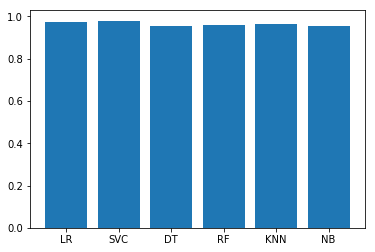

In [22]:
plt.bar(*zip(*results.items()))
plt.show()

In [23]:
#definindo o modelo final (o que se saiu melhor nos testes)
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.3, random_state = 1)

final_model = svm.SVC(gamma="auto")
            
final_model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
pred_csv = final_model.predict(x_test)

## Accuracy com dados de teste

In [25]:
metrics.accuracy_score(y_test, pred_csv)

0.9777777777777777

## Accuracy com dados de treino

In [26]:
metrics.accuracy_score(y_train, final_model.predict(x_train))

0.9809523809523809